In [1]:
using LinearAlgebra
using Statistics
using Plots
gr()

Plots.GRBackend()

In [2]:
eye(T::Type, n) = Diagonal{T}(I, n)
eye(n) = eye(Float64, n)

eye (generic function with 2 methods)

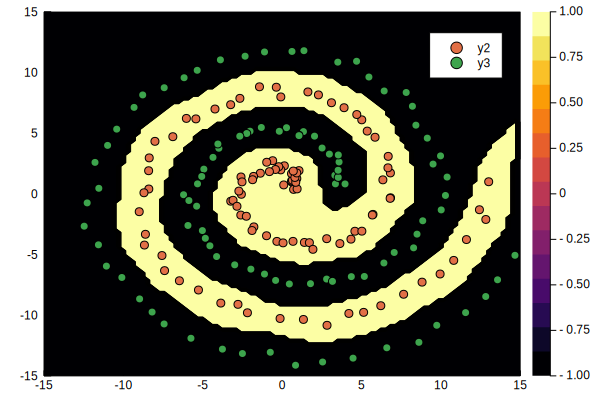

In [5]:
n = 200
a = range(0, stop=4pi, length=div(n, 2))

u = vcat(a .* cos.(a), (a .+ pi) .* cos.(a)) + 1 * rand(n, 1)
v = vcat(a .* sin.(a), (a .+ pi) .* sin.(a)) + 1 * rand(n, 1)
x = hcat(u, v)
y = [ones(1, div(n, 2)) -ones(1, div(n, 2))]'

x2 = sum(x .^ 2, dims=2)
hh = 2 * 1 ^ 2;
l = 0.01
k = exp.(-(repeat(x2, 1, n) + repeat(x2', n, 1) - 2 * x * x') / hh)

t = (k .^ 2 + 1 * eye(n)) \ (k * y)

m = 100
X = range(-15, stop=15, length=m)
X2 = X .^ 2
U = exp.(-(repeat(u .^ 2, 1, m) + repeat(X2', n, 1) - 2 * u * X') / hh)
V = exp.(-(repeat(v .^ 2, 1, m) + repeat(X2', n, 1) - 2 * v * X') / hh)


contourf(X, X, sign.(V' * (U .* repeat(t, 1, m))))
plot!(x[dropdims(y .== 1, dims=2), 1], x[dropdims(y .== 1, dims=2), 2], st=:scatter, xlim=(-15, 15), ylim=(-15, 15))
plot!(x[dropdims(y .== -1, dims=2), 1], x[dropdims(y .== -1, dims=2), 2], st=:scatter)